# Water Quality Prediction

## Feature Selection

In [29]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading the modified dataframe
data_frame=pd.read_csv('modified_data_water_quality_prediction.csv')

In [5]:
data_frame.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0


In [6]:
#spliting the data into x(input) and y(output) features
x=data_frame.iloc[:,:-1]
y=data_frame.iloc[:,-1]

### Recursive Feature Elimination


The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 5)
fit = rfe.fit(x, y)
print("Number of Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Number of Features: 5
Selected Features: [False  True  True  True  True False  True False False]
Feature Ranking: [4 1 1 1 1 2 1 3 5]


In [49]:
feature_imp_data=pd.DataFrame({'columns':x.columns,'T/N':fit.support_,'Rank':fit.ranking_})

In [50]:
feature_imp_data.sort_values(by='Rank')

,columns,T/N,Rank
1,Hardness,True,1
2,Solids,True,1
3,Chloramines,True,1
4,Sulfate,True,1
6,Organic_carbon,True,1
5,Conductivity,False,2
7,Trihalomethanes,False,3
0,ph,False,4
8,Turbidity,False,5


## Feature importance

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

In [51]:
#extracting the features
model = ExtraTreesClassifier(n_estimators=50)
model.fit(x,y)
print(model.feature_importances_)

[0.12595347 0.12046869 0.11547027 0.11263736 0.12513483 0.10308257
 0.09921521 0.09951102 0.09852658]


In [52]:
feature_value_data=pd.DataFrame({'columns':x.columns,'importance':model.feature_importances_})

In [54]:
new_order=feature_value_data.sort_values(by='importance',ascending=False)

In [56]:
new_order

,columns,importance
0,ph,0.125953
4,Sulfate,0.125135
1,Hardness,0.120469
2,Solids,0.115470
3,Chloramines,0.112637
5,Conductivity,0.103083
7,Trihalomethanes,0.099511
6,Organic_carbon,0.099215
8,Turbidity,0.098527


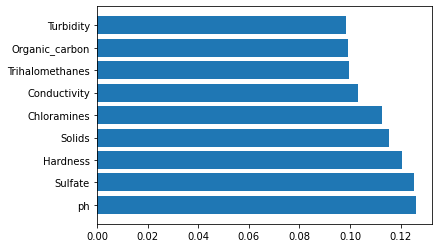

In [61]:
plt.barh(new_order['columns'],new_order['importance']);

let's consider ExtraTreeClassifier(Feature importance) model and take the features which have the importance value more than or equal to 0.1

In [69]:
new_columns=new_order[new_order['importance']>=0.1]['columns']

In [73]:
new_x=data_frame[new_columns]
new_input_data=pd.concat([new_x,y],axis=1)

In [74]:
new_input_data

,ph,Sulfate,Hardness,Solids,Chloramines,Conductivity,Potability
0,0.502625,0.680385,0.571139,0.336096,0.543891,0.669439,0.0
1,0.265434,0.579704,0.297400,0.300611,0.491839,0.719411,0.0
2,0.578509,0.579704,0.641311,0.321619,0.698543,0.414652,0.0
3,0.594055,0.647347,0.605536,0.356244,0.603314,0.317880,0.0
4,0.649445,0.514545,0.484851,0.289922,0.484900,0.379337,0.0
...,...,...,...,...,...,...,...
3271,0.333436,0.656047,0.530482,0.775947,0.533436,0.603192,1.0
3272,0.557775,0.579704,0.530016,0.279263,0.603473,0.368912,1.0
3273,0.672822,0.579704,0.465486,0.539101,0.547807,0.438152,1.0
3274,0.366197,0.579704,0.664407,0.191490,0.465860,0.387157,1.0


In [75]:
#saving the final input data frame

In [76]:
new_input_data.to_csv('final_input_data_water_quality_prediction.csv',index=False)